<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет,  Полина! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

# Исследовательский анализ данных

## Определение возраста покупателей

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:

- Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
- Контролировать добросовестность кассиров при продаже алкоголя.

Постройте модель, которая по фотографии определит приблизительный возраст человека. В вашем распоряжении набор фотографий людей с указанием возраста.

## Ход работы

1. Исследовательский анализ набора фотографий.
2. Подготовка данных к обучению.
3. Обучение нейронной сети

## Исследовательский анализ данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet import ResNet50

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

### Загрузка данных

In [2]:
data = pd.read_csv('/datasets/faces/labels.csv')

train_datagen = ImageDataGenerator(rescale=1./255)

train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=data,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

Found 7591 validated image filenames.


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Верно использован ImageDataGenerator как инструмент для доступа к потоку фотографий. Но обрати внимание на название переменных train_datagen  и train_gen_flow. На мой взгляд они не соответсвуют тому, что в них, ведь ты еще не производишь разделение потоков фотографий на обучающий и валидационный наборы.   
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Теперь ты знаешь количество фотографий в датасете. Учитывая эту информацию, а также то, что ты знаешь что мы решаем задачу регрессии, попробуй порассуждать, достаточно ли имеющихся данных? Какие шаги мы можем предпринять в связи с этим?   

</div>

### Информация о данных

In [3]:
data.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [5]:
data.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


### Графики распределения возраста

<Figure size 1080x720 with 0 Axes>

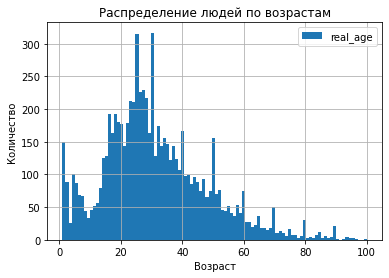

In [6]:
plt.figure(figsize=(15, 10))
data.plot.hist(bins=100, grid=True)
plt.title('Распределение людей по возрастам')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Информативная гистограмма. Молодец, что не забываешь про оформление графиков: есть название и подписи осей.</div>

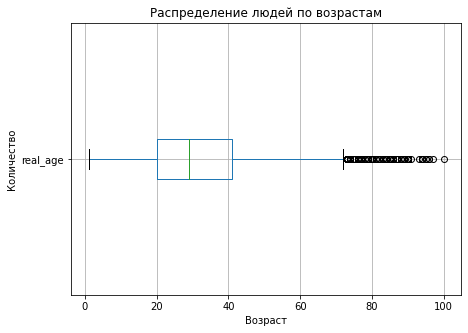

In [7]:
plt.figure(figsize=(7, 5))
data.boxplot(vert=False)
plt.title('Распределение людей по возрастам')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()
#data.boxplot(figsize=(10,10))

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Гистограмма и боксплот хорошо дополняют друг друга. Но что-бы их было проще изучать вместе лучше сделать их в одном масштабе и ориентации.</div>

### Пример фотографий из набора данных

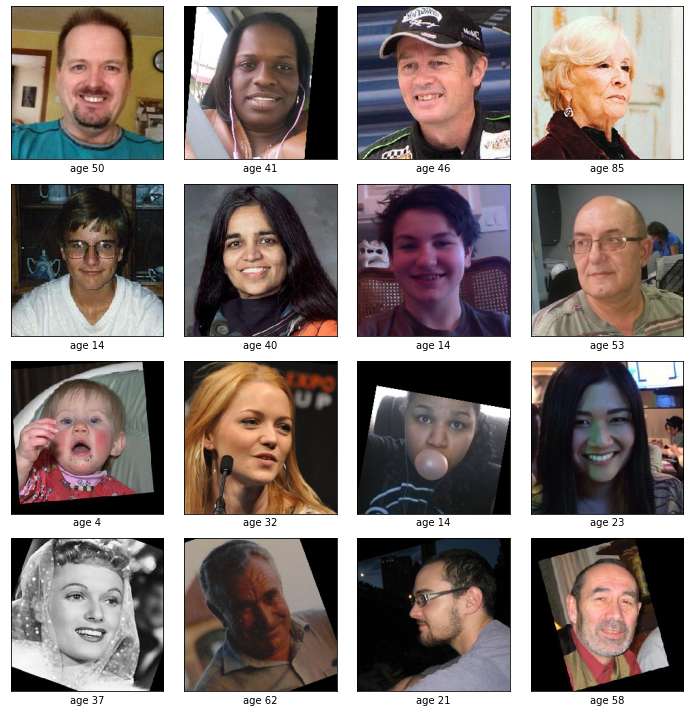

In [8]:
fig = plt.figure(figsize=(10,10))
for i in range(16):
    fig.add_subplot(4, 4, i+1) 
    plt.imshow(train_gen_flow[0][0][i])
    plt.xlabel(f'age {train_gen_flow[0][1][i]}')
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Очень хорошо, что выведены фотографии. Это хорошая практика, помогает увидеть изображения, с которыми будет работать наша модель, заметить какие-то детали и особенности, улучшить понимание задачи и получить определенную интуицию. А также заранее оценить подходящие для наших данных методы аугментации. </div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Молодец, что кроме изображений выводишь информацию о  возрасте </div>

### Промежуточные выводы:

1. Данные загружены и изучены (пропущенные значения отсутствуют в наборе данных)
2. Из графиков видно, что большинство фотографий приходятся на людей в возрасте от 20 до 40 лет. Выбросы удалять не стоит, так как они соответствуют реальным данным.
3. По фотографиям видно, что первичная аугментация уже проведена.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Очень хорошо, выполнен EDA и сформулированы выводы. В выводах рассмотрены три ключевых аспекта:

 - Размер датасета
 - Распределение целевого признака (возраста)
 - Особенности изображений, входящих в датасет   
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Похоже ты немного путаешь аугментацию и подготовку датасета.
    
Аугментация - это способ сделать из одного (исходного) изображения несколько похожих, но формально других. Применяются изменения яркости, контрастности, сдвиги, повороты, отражения. 
    
То, что ты принял за аугментацию - это повороты, примененные к изображениям. Попробую выдвинуть  гипотезу, почему часть фото повернуты. Нужно понять, как собирался датасет. Насколько я понимаю, вначале было собрано много самых разных фото из интернета (в том числе этим объясняется наличие в выборке черно-белых фото, кадров из фильмов и фото знаменитостей).
    
Дальше с помощью алгоритмов компьютерного зрения были выплнены следующие операции:
    
  - Определенены лица и вырезаны из фото
  - Найден угол отклонения лица от вертикали и сделана попытка выравнивания.
    
Если активнее посмотреть на данные, то можно найти места, где алгоритм "промазал" в поиске лица )). Но это большая редкость. Гораздо чаще встречаются ошибки с поворотами, по моим наблюдениям на некачественных фото или где алгоритму помешали посторонние преметы - очки, жевачка и т.д.
    


</div>

## Обучение модели

```python
optimizer = Adam(lr=0.0001)
 
def load_train(path):

    data = pd.read_csv('/datasets/faces/labels.csv')
    train_datagen = ImageDataGenerator(
                                    validation_split=0.25,
                                    rescale=1./255,
                                    vertical_flip=True,
                                    horizontal_flip=True)
    
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=data,
        directory='/datasets/faces/final_files',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345)
    return train_gen_flow

def load_test(path):

    data = pd.read_csv('/datasets/faces/labels.csv')
    test_datagen = ImageDataGenerator(
                                        validation_split=0.25,
                                        rescale=1./255)
    
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=data,
        directory= '/datasets/faces/final_files',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)
    return test_gen_flow
 
def create_model(input_shape):

    resnet = ResNet50(input_shape=input_shape,
                    weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
                    include_top=False)
    model = Sequential()
    model.add(resnet)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model
 
def train_model(model, train_data, test_data, batch_size=None, epochs=4,
                steps_per_epoch=None, validation_steps=None):
                
    model.fit(train_data, 
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2, shuffle=True)
    return model
```

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Написаны функции для создания датагенераторов, а также создания и обучения модели. 
<hr>   
    
Правильный выбор лосс-функции, также хорошо подобран шаг обучения.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Советую использовать аугментацию для обучающего набора, хотя бы отражение по горизонтали.

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning"><b>v2</b>
Обрати внимание, что при обучении ты используешь vertical_flip, т.е. учишь модель распознавать возраст на фото вверх ногами. Нужно ли это?

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
В функции create_model уже есть аргумент input_shape, рекомендую передать его в функцию ResNet50, а не передавать жестко заданные (150, 150, 3).

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Мы решаем задачу регрессии, а значит нам достаточно одного нейрона на выходном слое. А сейчас у нас 12 нейронов, значит модель будет предсказывать 12 чисел (правда они скорее всего все будут одинаковыми).
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> исправлено </div>

### Результат модели:
Found 5694 validated image filenames.

Found 1897 validated image filenames.

Train for 356 steps, validate for 119 steps

Epoch 1/4

356/356 - 108s - loss: 281.4474 - mae: 12.1744 - val_loss: 697.8660 - val_mae: 21.3574

Epoch 2/4

356/356 - 70s - loss: 74.3795 - mae: 6.5695 - val_loss: 124.6372 - val_mae: 8.3955

Epoch 3/4

356/356 - 78s - loss: 41.9153 - mae: 5.0146 - val_loss: 95.8512 - val_mae: 7.3018

Epoch 4/4

356/356 - 78s - loss: 26.0300 - mae: 3.9838 - val_loss: 74.4569 - val_mae: 6.4413

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Модель обучена и преодолела планку требуемой точности </div>

## Результаты

Была построена модель ResNet50, предобученная на InageNet со слоями GlobalAveragePooling2D и Dense.

Результат модели на тестовой выборке - 6.44

Данная модель хорошо предсказывает возраст людей по фотографии, но ее нельзя использовать в некоторых задачах, например, определять совершеннолетний ли человек. 

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Указаны основные моменты, касающиеся построения сети и её обучения. Если решишь доработать, можешь использовать следующую структуру как основу:
    
   - Используемая архитектура, а также использовалась ли предобученная модель или с рандомными весами.
   - Как мы обучали модель: количество эпох, размер батча, оптимизатор, примененная аугментация.
   - Достигнутый результат, столкнулись ли с переобучением


</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий v2</b>

Проект принят. Поздравляю и желаю дальнейших успехов!
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

Давай подведем итоги. 
Ты провел содержательный EDA, а также использовал предобученную модель и c помощью finetuning и transfer-learning обучил нейронку определять возраст покупателей. Требуемая точность получена. 
    
    
Что нужно доработать обязательно: Пожалуйста измени количество нейронов в финальном слое модели.
  
    
    
        
Жду твой проект на финальное ревью :)
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> дополнительные материалы </b>
В курсе уже есть ссылки на отдельные статьи. Со своей стороны поделюсь неплохими бесплатными курсами по нейронкам, дающим целостную картинку.
    
   - "Дип Лернинг на пальцах" (https://www.youtube.com/playlist?list=PL5FkQ0AF9O_o2Eb5Qn8pwCDg7TniyV1Wb).
   - Отличный бесплатный курс от Школы глубокого обучения МФТИ (https://stepik.org/org/dlschool), старт курса каждые пол года. Два семестра, один по основам и компьютерному зрению, второй по обработке естественного языка.
   - "Нейронные сети и компьютерное зрение" от Samsung Research Russia (https://stepik.org/course/50352/syllabus). Есть также продолжение по NLP.  

</div>